In [136]:
# pandas, numpy, pyplot 라이브러리 가져오기
import pandas as pd # 
import numpy as np #
import matplotlib.pyplot as plt #
pd.set_option('display.max_rows',None) # 출력값 길이 제한 없음

#### < 데이터셋 개요>
- Survived: 생존 여부
    - 0 = No
    - 1 = Yes
- pclass: 티켓 등급
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Name : 이름, 사회적등급
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

### 데이터 적재

In [137]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
# 컬럼을 소문자로 만들어 주세요.
#### .rename 활용
# data.rename(columns = str.lower)
#### .str.lower() 
# data.columns = data.columns.str.lower()

data.columns = data.columns.map(str.lower)

In [139]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측치 확인
- 컬럼별 갯수
- 데이터셋의 크기가 작은 경우는 결측치가 있는 레코드를 삭제하지 않는다.
    - 대체하는 방식으로 전처리

In [140]:
data.shape

(891, 12)

In [141]:
# data.isnull()은 값이 있으면 False, 없으면 True를 셀에 배치하는데
# 파이썬 특성상 True는 1로 간주하고 False는 0으로 간주하므로
# isnull()에 대해 총합을 구하면, 결측치 개수를 구할 수 있습니다.
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [142]:
# 전체 데이터 대비 결측치의 비중
# 결측치 / 891(전체 데이터 개수) * 100 = 비율
data.isnull().sum() / 891 *100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

# 불필요한 변수 제거
- tiket

In [143]:
# .drop(axis=1 , implace=True)
data.drop('ticket', axis=1,inplace = True)
# del 
# del data['ticket']

In [144]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [145]:
# 누락 확인
'ticket' in data.columns

False

In [146]:
# ticket 컬럼을 누락시킨 csv 파일을 외부로 빼내기
# ticket_deleted_titanic.csv
# 단, 그냥 to_csv를 할 경우는 자동으로 csv에 row명을 매겨주기 때문에
# 추후 다시 import할때 Unnamed : 0 컬럼이 들어옵니다.
# 이를 방지하기 위해 index=False를 줄 수 있습니다.
data.to_csv('ticket_deleted_titanic.csv', index = False)

#### Cabin 데이터를 활용하여 유도변수 생성

- 개별 객실 번호는 의미가 없음(123, 456 ...)
- cabin 데이터의 첫 글자가 deck(구역)을 의미
- 유도변수 : deck컬럼 추가
- deck 컬럼에 추가될 자료 : A, B, C, D, E, F, G, T, unknown

- cabin 컬럼의 각 값에 적용할 처리
    - 1)
        - 값의 첫 번째 문자가 deck list에 있으면 해당 deck을 반환
        - 없으면(NaN) deck list의 unknown 반환
    - 2)
        - 첫 번째 문자 반환
        - 없으면 다른 것 반환
  

In [147]:
# NaN
# 1. type = float
# 2. 다른 값으로 대체해서 처리
# 3. str으로 변경

In [148]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [149]:
deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
sample = ['C123', np.nan, 'D201', np.nan, 'F999']
# result = ['C', 'unknown', 'D', 'unknown', 'F']

In [150]:
# 함수를 정의해서, apply나 map을 이용해서 유도변수로 교체해 주세요.
data['deck'] = -1
def cabin_to_deck(value):
    if type(value)== str:
        return value[0]
    if type(value)== float:
        return "unknown"

In [151]:
# 함수를 정의해서, apply나 map을 통해 유도변수로 교체해주세요.
def cabin_to_deck(value):
    deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
    # NaN인지 검사
    if type(value)==type(np.nan):
        return 'unknown'
    # NaN가 아니면 덱 종류만 리턴
    elif value[0] in deck_list:
    # 덱 리스트에 분류된 덱이 맞는지 체크
        return value[0]
    else:
        return 'unknown'

In [152]:
# 컬럼명은 'deck' 으로 해주세요.

In [153]:
data['deck']= data['cabin'].map(cabin_to_deck)
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown


In [154]:
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,NaN,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,NaN,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,NaN,S,unknown
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,NaN,S,unknown
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,NaN,S,unknown
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,NaN,C,unknown


In [155]:
len(data['cabin'])

891

In [156]:
len(data['deck'])

891

#### Name 데이터를 활용하여 유도변수 생성
- 개별 이름은 모델 예측에 유의미한 변수가 아니다.
- 대표 특성을 찾을 수 있는 범주 데이터를 추출할 수 있다.
- Mr, Ms, Miss, Master ...
- 추출 하여 title 컬럼으로 추가
- 첫번째 방법. split() 두번 사용하여 처리
- 두번째 방법. 정규식을 사용하여 처리
    - ver1
        - 정규식 패턴 생성에 사용할 문자열 : Sir, Mr, Don, Major, Capt, Jonkheer, Rev, Col, Dr, Mrs, Countess, Dona, Mme, Ms, Miss, Mlle, Master
        - 정규식 사용 순서 : 원본 문자열에서 split 결과의 1번 인덱스 값
    - ver2
        - 정규식 패턴 : [a-zA-Z]+\.

In [157]:
# split을 활용햇, name컬럼의 값들을 칭호만 남겨서 저장해주세요.
# 새로운 컬럼인 splited_name 컬럼에 저장해 주시면 됩니다.
def name_split(value):
    return value.split(', ')[1].split(' ')[0]

In [158]:
data['splited_name'] = -1
data['splited_name'] = data['name'].map(name_split)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,NaN,S,unknown,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,NaN,S,unknown,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,NaN,S,unknown,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,unknown,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,E46,S,E,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,NaN,S,unknown,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,NaN,S,unknown,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,NaN,C,unknown,Mrs.


In [159]:
# 정규표현식 사용을 위해 import re 실행
import re

In [160]:
# 정규표현식은 re.compile('내부 패턴', re.I)를 이용하면 해당 단어만 뽑아줍니다.
# 이를 위해서 반드시 먼저 import re 가 실행되어 있어야 합니다.
# 단어 리스트를 가지고 정규식 패턴 적용
def get_title(name):
    # 둘 이상의 단어를 타겟으로 잡을때는 |(쉬프트 + 역슬래시)를 사용합니다.
    pattern = re.compile('Sir|Mrs|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mr|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.I)
    # 정규식변수.search(타겟) => 타겟에서 패턴에 해당하는 자료가 있는지 조사
    result = pattern.search(name)
    print(result.group())
    if result:
        return result.group().lower()
    else:
        str(np.nan)

In [161]:
get_title('the Capt, man')

Capt


'capt'

In [162]:
# 위 정규식 실행 함수를 name에 적용하면 호칭만 뽑혀나옴
data['title'] = data['name'].apply(get_title)

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
ms
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
don
Mr
Mr
Mr
Mr
Miss
col
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Sir
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
dr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
col
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
dr
Mr
Mr
Miss
Mr
Rev
Rev
Mrs
Mr
Mr
Mr
ms
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Col
Mr
Mr
Miss
Miss
Col
Mr
Mr
Dr
Miss
Mrs
Mr
Rev
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
Mrs
Mr
Ma

In [163]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr.,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs.,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss.,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs.,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr.,mr


In [164]:
# re를 사용하지 않는 경우는 팬더스에서 .str.extract('패턴')를 사용한다.
# expand=False를 주지 않으면 DataFrame행으로 나옴
# 정규식에서 .는 한글자 의미 \는 구분하기위해 a-zA-z는 알파벳 
data['name'].str.extract('([a-zA-Z]+)\.', expand=False)

0            Mr
1           Mrs
2          Miss
3           Mrs
4            Mr
5            Mr
6            Mr
7        Master
8           Mrs
9           Mrs
10         Miss
11         Miss
12           Mr
13           Mr
14         Miss
15          Mrs
16       Master
17           Mr
18          Mrs
19          Mrs
20           Mr
21           Mr
22         Miss
23           Mr
24         Miss
25          Mrs
26           Mr
27           Mr
28         Miss
29           Mr
30          Don
31          Mrs
32         Miss
33           Mr
34           Mr
35           Mr
36           Mr
37           Mr
38         Miss
39         Miss
40          Mrs
41          Mrs
42           Mr
43         Miss
44         Miss
45           Mr
46           Mr
47         Miss
48           Mr
49          Mrs
50       Master
51           Mr
52          Mrs
53          Mrs
54           Mr
55           Mr
56         Miss
57           Mr
58         Miss
59       Master
60           Mr
61         Miss
62      

In [165]:
# 호칭별 개수
data['title'].value_counts()

mr          493
miss        177
mrs         123
master       39
dr           16
col          12
ms            8
rev           6
don           4
mme           4
sir           2
major         2
mlle          2
capt          1
countess      1
jonkheer      1
Name: title, dtype: int64

* 범주 재설정
    capt - Officer
    
    col - Officer
    
    major - Officer
    
    dr - Officer
    
    jonkheer - Royalty
    
    rev - Officer
    
    countess - Royalty
    
    dona - Royalty
    
    lady - Royalty
    
    don - Royalty
    
    sir - Officer
    
    mr - Mr
    
    mme - Mrs
    
    ms - Mrs
    
    mrs - Mrs
    
    miss - Miss
    
    mlle - Miss
    
    master - Master
    
    nan - Mr(최빈값)
    

In [166]:
title_map = {
    "capt":"Officer",
    "col":"Officer",
    "major":"Officer",
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    'sir' : 'Officer',
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

In [167]:
# data['title'] 에 들어있던 요소를 위의 규칙을 따라서 내부요소 변경해주기
data['title']= data['title'].map(title_map)

In [168]:
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,NaN,S,unknown,Mr.,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C85,C,C,Mrs.,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,NaN,S,unknown,Miss.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,C123,S,C,Mrs.,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,NaN,S,unknown,Mr.,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,unknown,Mr.,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,E46,S,E,Mr.,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,NaN,S,unknown,Master.,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,NaN,S,unknown,Mrs.,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,NaN,C,unknown,Mrs.,Mrs


#### 결측치 처리 - Age
- 미성년(Master, Miss)
- title 별 평균으로 age 결측치 대체
- transform
- (참고)사용자정의함수 : 매개변수 3개(타이틀별평균, 데이터, 타이틀리스트)

In [169]:
# age 컬럼 중 null이 들어온 컬럼 개수를 구해주세요.
data.age.isnull().sum()

177

In [170]:
# df['col'].transform(mean)
# df['col'].mean()
# df['col'].apply(lambda x : mean(x))
# df['col'].apply(함수)

In [ ]:
# title 별 age의 평균값
# groupby를 이용해 'title' 컬럼값별 나이 평균을 구해주세요.

In [174]:
data.groupby('title')[['age']].mean()

,age
title,
Master,4.362000
Miss,21.555556
Mr,32.346457
Mrs,35.659292
Officer,37.742857
Royalty,45.666667


In [175]:
# groupby 다음 사용하는 transform은 기존 값을 무시하고, 집계함수값으로 대체합니다.
# data.groupby('title')['age'].transform('mean')
data.groupby('title')['age'].transform('mean')

0      32.346457
1      35.659292
2      21.555556
3      35.659292
4      32.346457
5      32.346457
6      32.346457
7       4.362000
8      35.659292
9      35.659292
10     21.555556
11     21.555556
12     32.346457
13     32.346457
14     21.555556
15     35.659292
16      4.362000
17     35.659292
18     35.659292
19     35.659292
20     32.346457
21     32.346457
22     21.555556
23     32.346457
24     21.555556
25     35.659292
26     32.346457
27     32.346457
28     21.555556
29     32.346457
30     45.666667
31     35.659292
32     21.555556
33     45.666667
34     32.346457
35     32.346457
36     32.346457
37     32.346457
38     21.555556
39     37.742857
40     35.659292
41     35.659292
42     32.346457
43     21.555556
44     21.555556
45     32.346457
46     32.346457
47     37.742857
48     32.346457
49     35.659292
50      4.362000
51     32.346457
52     35.659292
53     35.659292
54     32.346457
55     32.346457
56     21.555556
57     32.346457
58     21.5555

In [179]:
# title 컬럼을 기준으로 묶은 자료들의 'age' 컬럼 평균차로
# 원래 'age'에 있던 결측치를 대신하기 위해 fillna를 써서 채워주세요.
data['age'].fillna(data.groupby('title')['age'].transform('mean'), inplace = True)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,unknown,Mr.,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,C,Mrs.,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,unknown,Miss.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,C,Mrs.,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,unknown,Mr.,Mr
5,6,0,3,"Moran, Mr. James",male,32.346457,0,0,8.4583,NaN,Q,unknown,Mr.,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S,E,Mr.,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S,unknown,Master.,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S,unknown,Mrs.,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C,unknown,Mrs.,Mrs


In [180]:
# 결측치가 사라졌는데 isnull().sum()으로 확인해주세요.
data['age'].isnull().sum()

0

#### Age 데이터를 범주형 데이터로 변경
- 나이 숫자값 자체로는 의미가 적다.
- 연령대로 구분하는 것이 더 의미가 있는 구분값
- 구간
    -  ~ 20
    - 20 ~ 40
    - 40 ~ 60
    - 60 ~
- 개수 : 4개
- pd.cut / np.digitize

In [181]:
# 사용자 정의함수
def age_class(value):
    if value < 20:
        return 'under 20'
    elif value >=20 and value < 40:
        return '20~40'
    elif value >=40 and value < 60:
        return '40~60'
    elif value >= 60:
        return 'over 60'

In [182]:
# data['age_class'] 를 만들어 저장해주세요.
# 내부의 값 하나하나를 함수 age_class를 이용해서 나이대별로 분류해주세요.
data['age_class'] = data['age'].map(age_class)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,unknown,Mr.,Mr,20~40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,C,Mrs.,Mrs,20~40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,unknown,Miss.,Miss,20~40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,C,Mrs.,Mrs,20~40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,unknown,Mr.,Mr,20~40
5,6,0,3,"Moran, Mr. James",male,32.346457,0,0,8.4583,NaN,Q,unknown,Mr.,Mr,20~40
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S,E,Mr.,Mr,40~60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S,unknown,Master.,Master,under 20
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S,unknown,Mrs.,Mrs,20~40
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C,unknown,Mrs.,Mrs,under 20


In [183]:
# 연령대별 생존 비율
# stacked bar chart
# 연령대별로 데이터가 몇 개 있는지
data['age_class'].value_counts()

20~40       560
under 20    168
40~60       137
over 60      26
Name: age_class, dtype: int64

In [187]:
# 그룹바이를 이용해, 연령대별 생존/사망자별 인원수를 출력해보세요.
data.groupby('age_class')[['survived']].sum()

,survived
age_class,
20~40,200
40~60,54
over 60,7
under 20,81


In [194]:
age_classed_data = data.groupby(['age_class','survived','sex'])[['survived']].count().copy()
age_classed_data

survived
age_class survived sex             
20~40     0        female        47
                   male         313
          1        female       138
                   male          62
40~60     0        female        12
                   male          71
          1        female        38
                   male          16
over 60   0        male          19
          1        female         4
                   male           3
under 20  0        female        22
                   male          65
          1        female        53
                   male          28

<AxesSubplot:xlabel='age_class,survived,sex'>

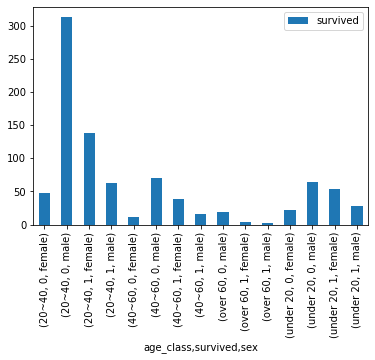

In [195]:
# 데이터프레임에 바로 plot(), hist() 등을 사용하면 실제로 그려줍니다.
age_classed_data.plot(kind='bar')

<AxesSubplot:xlabel='survived,sex'>

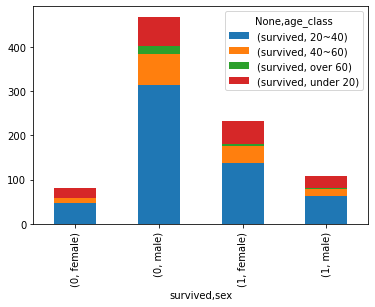

In [196]:
# bar차트를 좀 더 보기 쉽게 하기 위해
# survived를 x축에(row로), 나이정보를 y축에(column)으로 두기 위해 unstack()실행
age_classed_data.unstack(0).plot(kind = 'bar', stacked=True, )

In [197]:
barplot_data = age_classed_data.unstack(0)

#### 성별별 생존자, 탑승표 등급별 생존자 분석

In [ ]:
# 탑승표 등급별 생존자를 시각화해주세요.
# 1. 생존자와 사망자를 탑승표로 분류해서 가공합니다.
# 2. 차트로 만들어주세요.

In [199]:
# x축엔 생존여부(row 내지는 index에 survived가 와야함)
# y축에는 탑승표 종류(column에 pclass가 와야함)
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr.,Mr,20~40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs.,Mrs,20~40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss.,Miss,20~40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs.,Mrs,20~40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr.,Mr,20~40


In [211]:
pclass_data = data.groupby(['pclass','survived'])[['survived']].count().copy()

<AxesSubplot:xlabel='survived'>

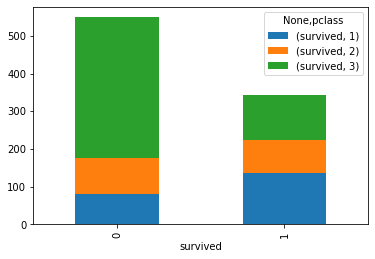

In [212]:
pclass_data.unstack(0).plot(kind='bar', stacked=True)